<a href="https://colab.research.google.com/github/auliaadila/Python-Audio-Coder/blob/master/pythonAudioCoderExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples for the Python Audio Coder

In [1]:
!git clone https://github.com/TUIlmenauAMS/Python-Audio-Coder
!mv ./Python-Audio-Coder/* .
!rm -r ./Python-Audio-Coder

Cloning into 'Python-Audio-Coder'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 212 (delta 72), reused 102 (delta 61), pack-reused 91 (from 1)
Receiving objects: 100% (212/212), 9.75 MiB | 20.84 MiB/s, done.
Resolving deltas: 100% (106/106), done.


## The encoder

max= 31831
Sampling rate= 44100


<ipython-input-3-3dfbe013f968>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, snd = wav.read('fantasy-orchestra.wav')


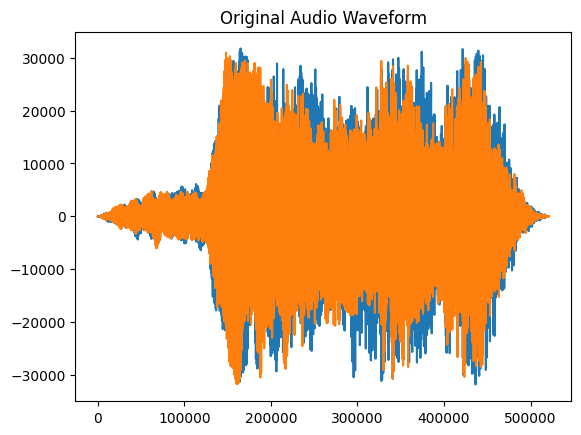

In [ ]:
from IPython.display import Audio
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np

rate, snd = wav.read('fantasy-orchestra.wav')
print("max=", np.max(abs(snd)))
# Plot and Listen to Audio File
plt.figure()
plt.title('Original Audio Waveform')
plt.plot(snd)
print('Sampling rate=', rate)

Audio('fantasy-orchestra.wav')

python3 audio_encoder.py audiofile.wav [quality]

Encoded signal in *.acod

In [ ]:
!pip3 install dahuffman
!python3 audio_encoder.py fantasy-orchestra.wav 100


audiofile= fantasy-orchestra.wav
/content/audio_encoder.py:37: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x= wav.read(audiofile)
channels= 2
Compressed file: fantasy-orchestra.acod
channel  0
quality= 100.0
Computing MDCT for sound file,
masking threshold calculation,
quantization according to the masking threshold,
Huffman Coding
channel  1
quality= 100.0
Computing MDCT for sound file,
masking threshold calculation,
quantization according to the masking threshold,
Huffman Coding
Total number of bytes= 217513
Total number of samples: 1041944
bytes per sample= 0.20875690056279417
Hence bis per sample= 1.6700552045023533


Observe: We obtained a compression rate of 0.209 bytes per sample, or 1.672 bits per sample.

In [ ]:
!ls -lt fantasy-orchestra.wav
!ls -lt fantasy-orchestra.acod


-rw-r--r-- 1 root root 2084036 Jan 22 14:48 fantasy-orchestra.wav
-rw-r--r-- 1 root root 222119 Jan 22 14:48 fantasy-orchestra.acod


## The decoder

python3 audio_decoder.py audiofile.acod

It writes the decoded audio signal in .wav format in file audiofilerek.wav



In [ ]:
!python3 audio_decoder.py fantasy-orchestra.acod


encoded file= fantasy-orchestra.acod
Decoded file: fantasy-orchestrarek.wav
fs= 44100 channels= 2
channel  0
Inverse MDCT
channel  1
Inverse MDCT


In [ ]:
Audio('fantasy-orchestrarek.wav')

Observe: Ideally the decoded audio signal should sound the same as the original.

# A Demo and Test of the Psycho-Acoustic Model


In [2]:
#in directory PythonPsychoacoustics
%cd /content/PythonPsychoacoustics
from psyac_quantization import *

/content/PythonPsychoacoustics


In [ ]:
N=1024 #number of MDCT subbands
nfilts=64  #number of subbands in the bark domain
#Sine window:
fb=np.sin(np.pi/(2*N)*(np.arange(int(1.5*N))+0.5))
print("Encoder part:")
#MDCT and quantization, using channel 0 of the auddio signal:
yq, y, mTbarkquant = MDCT_psayac_quant_enc(snd[:,0],rate,fb,N, nfilts,quality=100)

print("Decoder part:")
xrek, mT, ydeq = MDCTsyn_dequant_dec(yq, mTbarkquant, rate, fb, N, nfilts)

#Reconstructed audio:
Audio(xrek, rate=rate)

Encoder part:
quality= 100
Computing MDCT for sound file,
masking threshold calculation,
quantization according to the masking threshold,
Decoder part:
Inverse MDCT


Observe: The audio signal after this psycho-acoustic quantization ideally should sound the same as the original.

# Filter Bank Optimization

The folder also contains a few programs which show how to optimize different types of filter banks, with regard to their filter characteristics.

The following runs an optimization for an MDCT, in this example for N=4 subbands (and filter length 2N=8),

/content
starting error= 11477613059.917505
         Current function value: 862253523.602516
         Iterations: 54
         Function evaluations: 915
         Gradient evaluations: 129
optimized coefficients= [-0.25026879 -0.5606236  -0.82807227 -0.96817633 -0.96817704 -0.82807086]
error after optim.= 862253523.6025162
h= [0.25026656 0.56062122 0.82807086 0.96817704 0.96817633 0.82807227
 0.5606236  0.25026879]


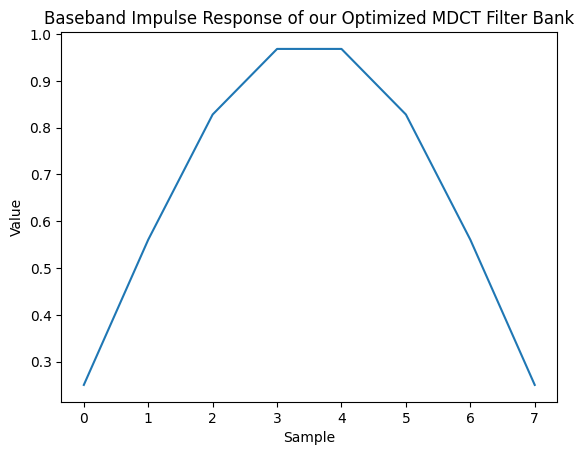

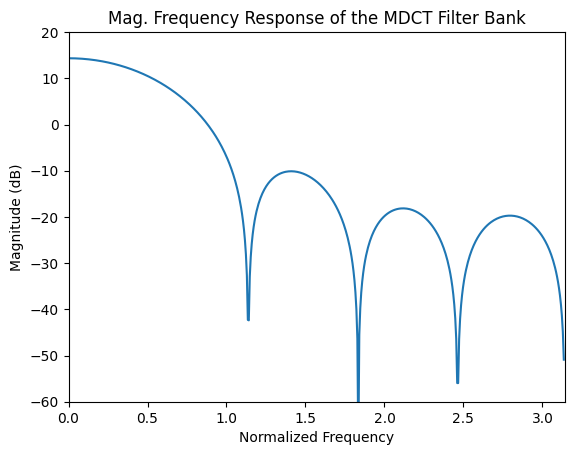

<Figure size 640x480 with 0 Axes>

In [ ]:
%cd /content/
%matplotlib inline

%run optimfuncMDCT.py


The following runs an optimization for a Low Delay Filter Bank, also for N=4, but filter length 3N=12, and system delay of 7 (including blocking delay of N-1=3, which doesn't show up in file based examples),

differential_evolution step 1: f(x)= 9.13791e+06
differential_evolution step 2: f(x)= 8.31381e+06
differential_evolution step 3: f(x)= 8.31381e+06
differential_evolution step 4: f(x)= 6.6893e+06
differential_evolution step 5: f(x)= 6.29276e+06
differential_evolution step 6: f(x)= 5.4052e+06
differential_evolution step 7: f(x)= 5.4052e+06
differential_evolution step 8: f(x)= 2.60539e+06
differential_evolution step 9: f(x)= 2.60539e+06
differential_evolution step 10: f(x)= 2.60539e+06
differential_evolution step 11: f(x)= 2.60539e+06
differential_evolution step 12: f(x)= 2.60539e+06
differential_evolution step 13: f(x)= 2.60539e+06
differential_evolution step 14: f(x)= 2.10248e+06
differential_evolution step 15: f(x)= 2.10248e+06
differential_evolution step 16: f(x)= 2.10248e+06
differential_evolution step 17: f(x)= 2.10248e+06
differential_evolution step 18: f(x)= 1.73413e+06
differential_evolution step 19: f(x)= 1.73413e+06
differential_evolution step 20: f(x)= 1.73413e+06
differential

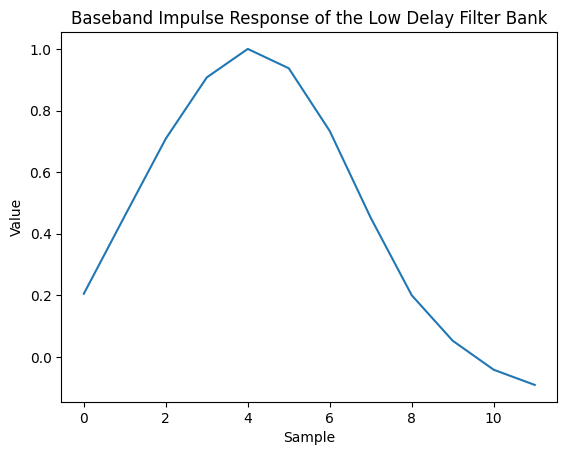

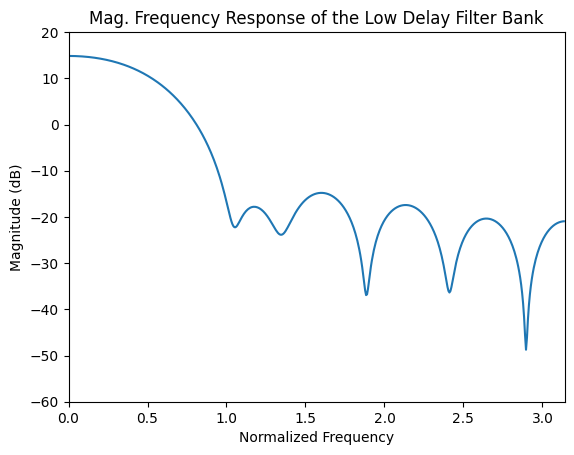

<Figure size 640x480 with 0 Axes>

In [ ]:
%run optimfuncLDFB.py


The last runs an optimization for a PQMF filter bank, for N=4 subbands and filter length 8N=32, and system delay of 31 (including the blocking delay of N-1=3),

/content/optimfuncQMF.py:41: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  x0 = 16*sp.ones(4*N)


starting error= 17268.454570708196
error after optim.= 0.024890602149674063
optimized coefficients= [ 7.54151548e-04  4.31711158e-03  1.37324740e-02  3.07910540e-02
  5.24041441e-02  6.83037471e-02  6.37722354e-02  2.89431506e-02
 -2.89179899e-02 -7.85591478e-02 -7.16867172e-02  3.49371516e-02
  2.51561138e-01  5.38259078e-01  8.12170982e-01  9.79886905e-01]


/content/optimfuncQMF.py:47: DeprecationWarning: scipy.savetxt is deprecated and will be removed in SciPy 2.0.0, use numpy.savetxt instead
  sp.savetxt("QMFcoeff.txt", xmin.x)
/content/optimfuncQMF.py:49: DeprecationWarning: scipy.flipud is deprecated and will be removed in SciPy 2.0.0, use numpy.flipud instead
  h = sp.concatenate((xmin.x,sp.flipud(xmin.x)))
/content/optimfuncQMF.py:49: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  h = sp.concatenate((xmin.x,sp.flipud(xmin.x)))


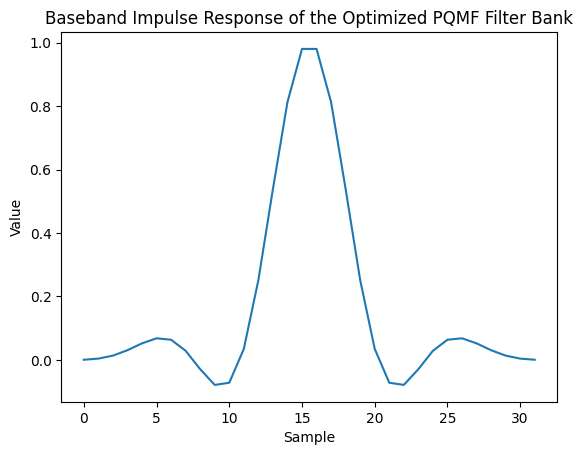

/content/optimfuncQMF.py:58: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  plt.plot(w,20*sp.log10(abs(H)))


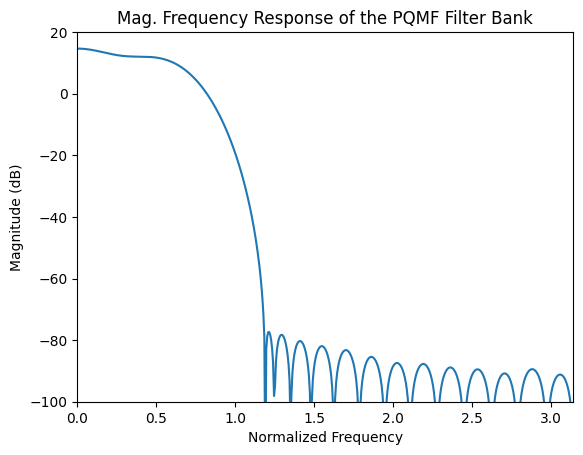

/content/optimfuncQMF.py:65: DeprecationWarning: scipy.square is deprecated and will be removed in SciPy 2.0.0, use numpy.square instead
  posfreq = sp.square(abs(H[0:int(512/N)]));
/content/optimfuncQMF.py:66: DeprecationWarning: scipy.square is deprecated and will be removed in SciPy 2.0.0, use numpy.square instead
  negfreq = sp.flipud(sp.square(abs(H[0:int(512/N)])))
/content/optimfuncQMF.py:66: DeprecationWarning: scipy.flipud is deprecated and will be removed in SciPy 2.0.0, use numpy.flipud instead
  negfreq = sp.flipud(sp.square(abs(H[0:int(512/N)])))


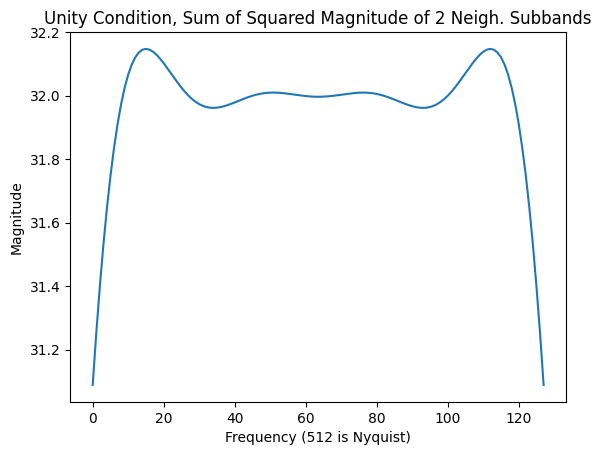

<Figure size 640x480 with 0 Axes>

In [ ]:
%run optimfuncQMF.py


# The Psycho-acoustic Pre- and Post-Filters

The psycho-acoustic pre-filter normalizes a signal to its psycho-acoustic masking threshold, such that a given error in time of over frequency has a comparable effect for hearing. This can also be seen as a psycho-acoustic domain where a mean squared error has a psycho-acoustic meaning. See the book for a more detailed description.

The functions for the psycho-acoustic pre-and post-filter are in psyacprepostfilter.py

A front end for the pre-filter for file processing is: psyacpostfilterFromFile.py.

Usage: python3 psyacprefilterToFile.py audiofile.wav [quality]

default for quaity is 100, higher numbers give higher quality but leads to higher bit-rate

# Predictive Lossless Audio Coding

## The Predictive Lossless Encoder

To execute our predictive lossless coder on an example audio file "test48khz.wav", we execute the following. It produces the file "fspeech.lacodpred". Instead of "test48khz.wav", we could also take a file from freesound.org.

Unfortunately the module "audio.coders" for the rice coder needs Python 2.7.

In [ ]:
!pip2.7 install audio.coders
!python2.7 lossless_predictive_audio_encoder.py test48khz.wav

/bin/bash: line 1: pip2.7: command not found
/bin/bash: line 1: python2.7: command not found


## The Predictive Lossless Decoder
We can execute the decoder with the follwing command.


It produces the file "test48khz.wav", which is identical to the original, but a few samples shorter, because the encoder only processes full Rice coding blocks.

In [ ]:
!python2.7 lossless_predictive_audio_decoder.py test48khz.lacodpred


/bin/bash: line 1: python2.7: command not found


# Scalable Lossless Audio Coding
## The Lossless Encoder

We apply the lossless audio encoder with the following command.


This produces the file with the reconstructed audio "stereosoundlarek.wav".

In [ ]:
!python2.7 lossless_rice_audio_encoder.py fantasy-orchestra.wav


/bin/bash: line 1: python2.7: command not found


## The Lossless Decoder
We can apply our lossless audio decoder with the following command.


the reconstructed file is somewhat smaller.

In [ ]:
!python2.7 lossless_rice_audio_decoder.py stereosound.lacodrice


/bin/bash: line 1: python2.7: command not found


In [ ]:
#List the newest 2 generated files to observe the compression ratio
!ls -Arlt | tail -n 2

Gerald Schuller, gerald.schuller@tu-ilmenau.de, September 2023.

# Pyschoacoustical Model

In [ ]:
#in directory PythonPsychoacoustics
%cd /content/PythonPsychoacoustics
from psyacmodel import *